Combined Sentiment Analysis and Price Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# change search term then run all
# aave,  comp, crv, mkr, sushi, uni,  btc and eth lacking tweet data
search_term = "uni"
tweet_path = 'Tweets\{}.xlsx'.format(search_term)
price_path = 'Price Data\{}.xlsx'.format(search_term)

In [3]:
df = pd.read_excel(tweet_path, sheet_name= "WorkingCopy")

In [4]:
# sentiment analysis
import re
from nltk.corpus import stopwords

stop = stopwords.words('english')

def clean_content(contentInput):
    if type(contentInput) == np.float:
        return ""
    contentInput = contentInput.lower()
    contentInput = re.sub("'", "", contentInput) # to avoid removing contractions in english
    contentInput = re.sub("@[A-Za-z0-9_]+","", contentInput)
    contentInput = re.sub("#[A-Za-z0-9_]+","", contentInput)
    contentInput = re.sub(r'http\S+', '', contentInput)
    contentInput = re.sub('[()!?]', ' ', contentInput)
    contentInput = re.sub('\[.*?\]',' ', contentInput)
    contentInput = re.sub("[^a-z0-9]"," ", contentInput)
    contentInput = contentInput.strip()
    contentInput = contentInput.split()
    contentInput = [w for w in contentInput if not w in stop]
    contentInput = " ".join(word for word in contentInput)
    return contentInput

In [5]:
monthList = pd.date_range('2021-09-01','2022-03-07', 
            freq='MS').strftime("%m/%Y").tolist()

timeSplitData={}
timeSplitDataSentiment = {}

for month in monthList: 
    timeSplitData[month] = []
    timeSplitDataSentiment[month] = [] 

In [6]:
for row in df.iterrows():
    #extracting month data from row
    dateData = row[1]['Date']
    tmp = dateData.find('/')
    monthData = dateData[tmp+1:] #removing day e.g '12/'
    if len(monthData) == 6:
        monthData = "0"+monthData
    
    if monthData in timeSplitData: # check if data is in range of date we want to analyse
        content = row[1]['Content']
        #cleaning Data
        cleaned = clean_content(content)
        #Storing into time split dict
        timeSplitData[monthData].append(cleaned)

C:\Users\yanwe\AppData\Local\Temp/ipykernel_19552/1182993678.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(contentInput) == np.float:


In [7]:
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [8]:
for month in timeSplitData:
    for content in timeSplitData[month]:
        output = sid.polarity_scores(content)
        timeSplitDataSentiment[month].append(output)

In [9]:
timeSplitDataNetScore = {}
for month in monthList:
    timeSplitDataNetScore[month] = 0 
    
for month in timeSplitDataSentiment:
    for output in timeSplitDataSentiment[month]:
        compound = output['compound']
        compound = compound / len(timeSplitDataSentiment[month])
        timeSplitDataNetScore[month] +=compound

In [10]:
df2 = pd.read_excel(price_path, sheet_name="working")

In [11]:
time = df2["time"].to_numpy()
price = df2["PriceUSD"].to_numpy()

Text(0, 0.5, 'Price in USD')

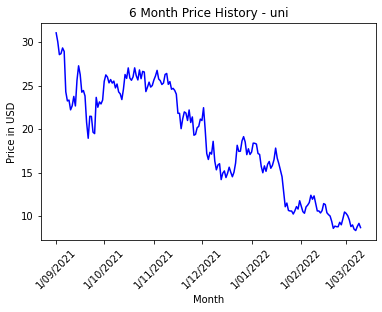

In [12]:
plt.plot(time, price, color="blue", linestyle="solid")

plt.title(('6 Month Price History - {}').format(search_term))
plt.xlabel('Month')
months = ["1/09/2021","1/10/2021","1/11/2021","1/12/2021","1/01/2022", "1/02/2022", "1/03/2022"]
plt.xticks(ticks = months, rotation = 45)
plt.ylabel('Price in USD')

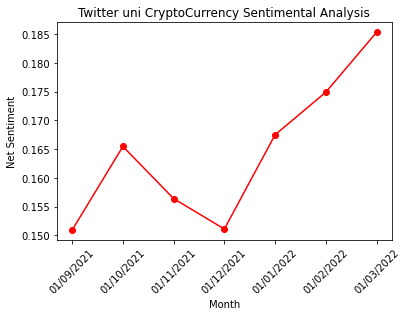

In [13]:
xAxis = []
yAxis = []

for date in timeSplitDataNetScore:
    xAxis.append("01/" + date)
    yAxis.append(timeSplitDataNetScore[date])

plt.plot(xAxis,yAxis, color='red', marker='o')
plt.title(('Twitter {} CryptoCurrency Sentimental Analysis').format(search_term))
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Net Sentiment')
plt.show()


Text(0.5, 0, 'Month')

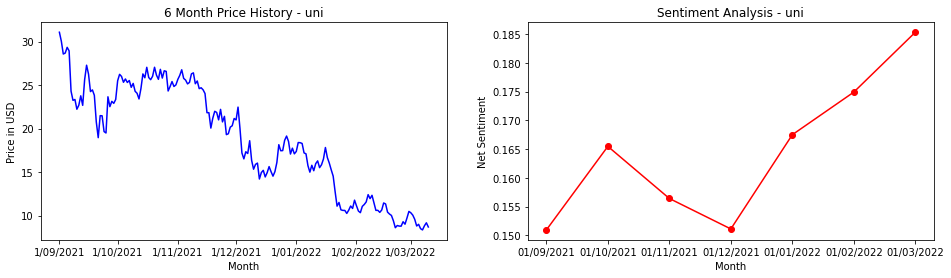

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(time, price, color="blue", linestyle="solid")
ax1.set_xticks(ticks = months)
ax1.set_title(('6 Month Price History - {}').format(search_term))
ax1.set_ylabel('Price in USD')
ax1.set_xlabel('Month')
ax2.plot(xAxis,yAxis, color='red', marker='o')
ax2.set_title(('Sentiment Analysis - {}').format(search_term))
ax2.set_ylabel('Net Sentiment')
ax2.set_xlabel('Month')

In [15]:
tmp = pd.read_excel(price_path, sheet_name="working")
df3 = pd.DataFrame()
target = ["1/09/2021","1/10/2021","1/11/2021","1/12/2021","1/01/2022", "1/02/2022", "1/03/2022"]

for i in target:
    j =(tmp.loc[tmp['time'] == i])
    df3 = df3.append(j)

update = pd.Series(["01/09/2021","01/10/2021","01/11/2021","01/12/2021","01/01/2022", "01/02/2022", "01/03/2022"], name='time', index=[0,30,61,91,122,153,181])
df3.update(update)

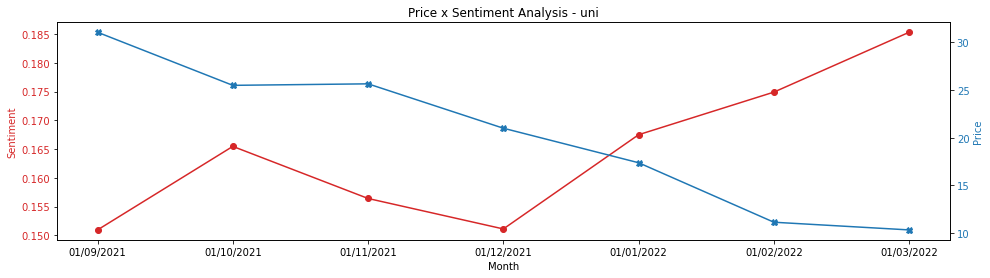

In [16]:
time2 = df3["time"].to_numpy()
price2 = df3["PriceUSD"].to_numpy()

fig, ax3 = plt.subplots(figsize=(16, 4))

color = 'tab:red'
ax3.set_xlabel('Month')
ax3.set_ylabel('Sentiment', color=color)
ax3.plot(xAxis,yAxis, color=color, marker='o')
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()

color = 'tab:blue'
ax4.set_ylabel('Price', color=color)  
ax4.plot(time2, price2, color=color, marker='X')
ax4.tick_params(axis='y', labelcolor=color)

plt.title(("Price x Sentiment Analysis - {}").format(search_term))
plt.show()

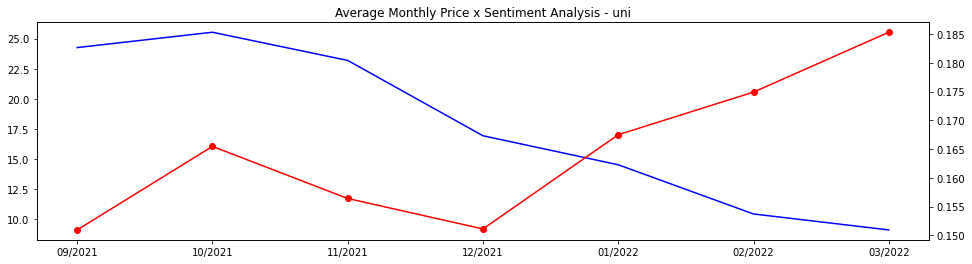

In [21]:
df4 = pd.read_excel(price_path, sheet_name="working")

month1 = df4["month"].to_numpy()
avgPrice = df4["avgPriceUSD"].to_numpy()

#remove nans
cleanMonth = [x for x in month1 if str(x) != 'nan']
cleanAvgPrice = [x for x in avgPrice if str(x) != 'nan']

fig2, ax5 = plt.subplots(figsize=(16, 4))

ax5.plot(cleanMonth, cleanAvgPrice, color="blue", linestyle="solid")

ax6 = ax5.twinx()

xA = []
yA = []

for date in timeSplitDataNetScore:
    xA.append(date)
    yA.append(timeSplitDataNetScore[date])

ax6.plot(xA,yA, color='red', marker='o')

plt.title(("Average Monthly Price x Sentiment Analysis - {}").format(search_term))
plt.show()
